# Importação de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tratamento dos dados

In [2]:
csv_falsos = pd.read_csv('Fake.csv')
csv_verdadeiros = pd.read_csv('True.csv')

## Tratamento dos dados de Fake.csv

In [3]:
csv_falsos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


não tem valores ausentes então não precisamos tratar valores ausentes, são todos no formato de objeto, a coluna de date deveria ser em datetime mas como não vamos trabalhar com essa coluna não vou alterar isso

In [4]:
csv_falsos.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


daqui a gente tira que existe notícias com titulos ou textos repetidos então vou remover elas e a gente tem apenas 6 assuntos diferentes o que eu não sei se pode ser um problema

In [5]:
csv_falsos.duplicated().sum()

np.int64(3)

In [6]:
csv_falsos = csv_falsos.drop_duplicates()
csv_falsos = csv_falsos.drop_duplicates(subset=['title', 'text'], keep='first')
csv_falsos = csv_falsos.drop_duplicates(subset=['title'], keep='first')
csv_falsos = csv_falsos.drop_duplicates(subset=['text'], keep='first')
csv_falsos.describe()

,title,text,subject,date
count,17450,17450,17450,17450
unique,17450,17450,5,1681
top,A Troubled King: Chicago’s Rahm Emanuel Desper...,21st Century Wire says It s not that far away....,News,"May 26, 2016"
freq,1,1,9049,35


duplicadas removidas

## Tratamento dos dados de True.csv

In [7]:
csv_verdadeiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
csv_verdadeiros.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


igual do fake.csv os titulos se repetem o que é de certa forma normal por ser notícia mas acho que pode causar overfitting no algoritmo então vou remover esses que se repetem, e não sei se o fato de só ter 2 assuntos diferentes também pode afetar em algo

In [9]:
csv_verdadeiros.duplicated().sum()

np.int64(206)

In [10]:
csv_verdadeiros = csv_verdadeiros.drop_duplicates()
csv_verdadeiros = csv_verdadeiros.drop_duplicates(subset=['title', 'text'], keep='first')
# aqui eu to removendo duplicadas que tem titulo E texto igual e mantendo apenas a primeira
csv_verdadeiros = csv_verdadeiros.drop_duplicates(subset=['title'], keep='first')
csv_verdadeiros = csv_verdadeiros.drop_duplicates(subset=['text'], keep='first')

In [11]:
csv_verdadeiros.describe()

,title,text,subject,date
count,20821,20821,20821,20821
unique,20821,20821,2,716
top,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,politicsNews,"December 6, 2017"
freq,1,1,11147,165


# Pré-processamento de Texto

## Importação de Bibliotecas

In [12]:
import re
#esse aq é o natural language tool kit que a gente vai usar pra remover as stopwords
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
#baixando as stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/larissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# aqui a gente ta deixando os textos em formatos padroes

def limpar_texto(texto):
    texto = texto.lower()  # tudo em minúsculo
    texto = re.sub(r'\d+', '', texto)  # remove números
    texto = re.sub(r'[^\w\s]', '', texto)  # remove pontuação
    texto = texto.strip()  # remove espaços antes e depois
    return texto

#aplicando a limpeza nos datasets
csv_falsos['text_limpo'] = csv_falsos['text'].apply(limpar_texto)
csv_verdadeiros['text_limpo'] = csv_verdadeiros['text'].apply(limpar_texto)

* Adicionamos o rótulo 0 para notícias falsas e 1 para notícias verdadeiras *

In [15]:
csv_falsos['label'] = 0
csv_verdadeiros['label'] = 1

* agora a gente junta os dois em um unico dataset *

In [16]:
noticias = pd.concat([csv_falsos, csv_verdadeiros], ignore_index=True)

In [17]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38271 entries, 0 to 38270
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       38271 non-null  object
 1   text        38271 non-null  object
 2   subject     38271 non-null  object
 3   date        38271 non-null  object
 4   text_limpo  38271 non-null  object
 5   label       38271 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


* removendo as stopwords *

In [18]:
stop_words = set(stopwords.words('english'))

def remover_stopwords(texto):
    palavras = texto.split()
    palavras_filtradas = [p for p in palavras if p not in stop_words]
    return ' '.join(palavras_filtradas)

noticias['text_limpo'] = noticias['text_limpo'].apply(remover_stopwords)

## Vetorização dos textos com TF-IDF

aq a gente ta criando um vetorizador TF-IDF que transforma o texto em uma matriz numérica baseada na importancia das palavras, ele calcula essa importância com base na frequência de cada palavra mas se ela aparece em muitos documentos ela deixa de ser importante (nao sei se deu pra entender)

In [19]:
vetorizado = TfidfVectorizer(max_features=1500)  # aqui eu to falando pra ele considerar apenas as 1500 mais importantes fazendo isso a gente evita overf
X = vetorizado.fit_transform(noticias['text_limpo'])  
y = noticias['label']

## Separação dos dados em treino e teste

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # aqui eu deixei 20% para treino e 80% para teste

# Algoritmo de PLN

## Algoritmo 1 - Naive Bayes

esses resultados indicam que o modelo Naive Bayes teve um excelente desempenho na tarefa de classificação de notícias falsas e verdadeiras. A acurácia geral do modelo foi de 94%, ou seja, ele acertou corretamente a classificação em 94% das notícias do conjunto de teste (8861 exemplos no total).

Analisando por classe:

para as notícias falsas (classe 0), o modelo teve 94% de precisão (ou seja, das notícias que ele previu como falsas, 94% realmente eram falsas) e 94% de recall (ou seja, ele conseguiu encontrar 94% de todas as falsas existentes no teste).
para as notícias verdadeiras (classe 1), a precisão foi de 93% e o recall também de 94%, indicando um desempenho equilibrado entre os dois tipos de notícia.
além disso, os valores de f1-score (média harmônica entre precisão e recall) ficaram em 0.94 para ambas as classes, mostrando que o modelo mantém um bom equilíbrio entre não perder exemplos nem gerar muitos falsos positivos.


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [22]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Resultados - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Resultados - Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3490
           1       0.93      0.95      0.94      4165

    accuracy                           0.94      7655
   macro avg       0.94      0.93      0.94      7655
weighted avg       0.94      0.94      0.94      7655



## Algoritmo 2 - Random Forest


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10) #aqui eu coloquei pro modelo fazer so uma arvore e altura maxima de 10 mas ja deu um resultado mt bom pqp
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Resultados - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Resultados - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3490
           1       0.98      1.00      0.99      4165

    accuracy                           0.99      7655
   macro avg       0.99      0.99      0.99      7655
weighted avg       0.99      0.99      0.99      7655



# Outros Algoritmos

## Algoritmo 3 - Logistic Regression
esse aqui o gepeto disse que vai muito bem com tf-idf+texto

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(max_iter=1000) 
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3490
           1       0.98      0.99      0.99      4165

    accuracy                           0.99      7655
   macro avg       0.99      0.98      0.99      7655
weighted avg       0.99      0.99      0.99      7655



## Algoritmo 4 - SVM

In [27]:
from sklearn.svm import LinearSVC

In [28]:
svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3490
           1       0.99      1.00      0.99      4165

    accuracy                           0.99      7655
   macro avg       0.99      0.99      0.99      7655
weighted avg       0.99      0.99      0.99      7655



## Algoritmo 5 - KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.61      0.95      0.74      3490
           1       0.92      0.50      0.65      4165

    accuracy                           0.70      7655
   macro avg       0.77      0.72      0.70      7655
weighted avg       0.78      0.70      0.69      7655



## Validação cruzada do SVM

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X, y, cv=5)
print(scores.mean())

0.987797438428219


# Matriz de Confusão para cada algoritmo

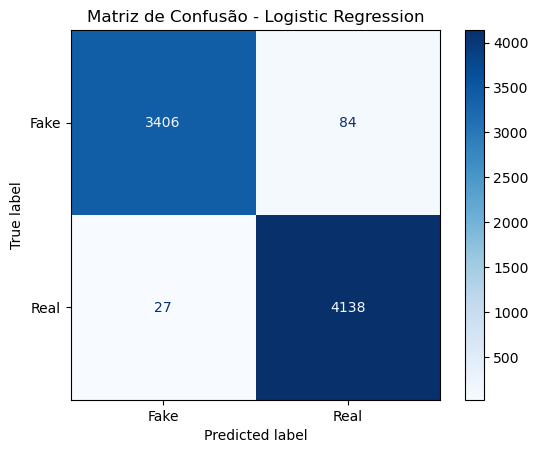

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Fake", "Real"])
disp_lr.plot(cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

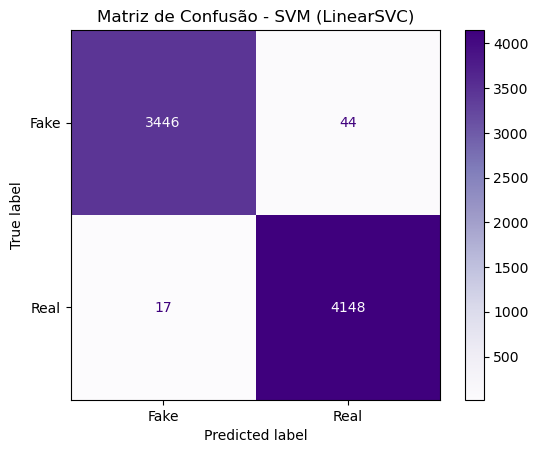

In [33]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Fake", "Real"])
disp_svm.plot(cmap='Purples')
plt.title("Matriz de Confusão - SVM (LinearSVC)")
plt.show()

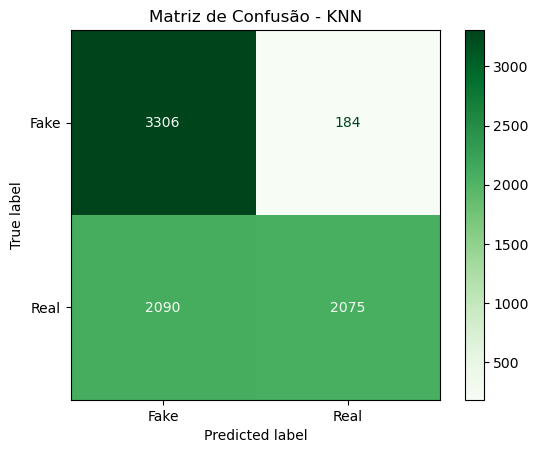

In [34]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Fake", "Real"])
disp_knn.plot(cmap='Greens')
plt.title("Matriz de Confusão - KNN")
plt.show()

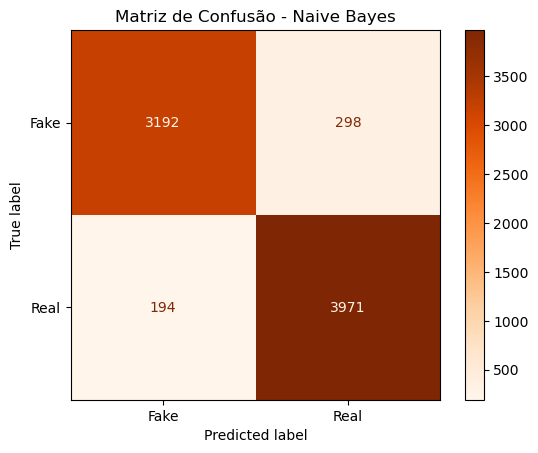

In [35]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Fake", "Real"])
disp_nb.plot(cmap='Oranges')
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

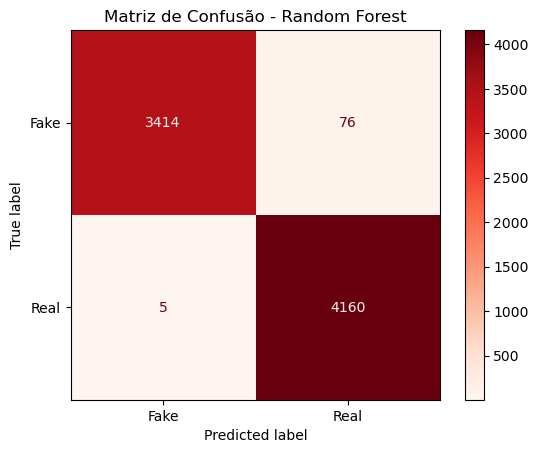

In [36]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Fake", "Real"])
disp_rf.plot(cmap='Reds')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Gráficos

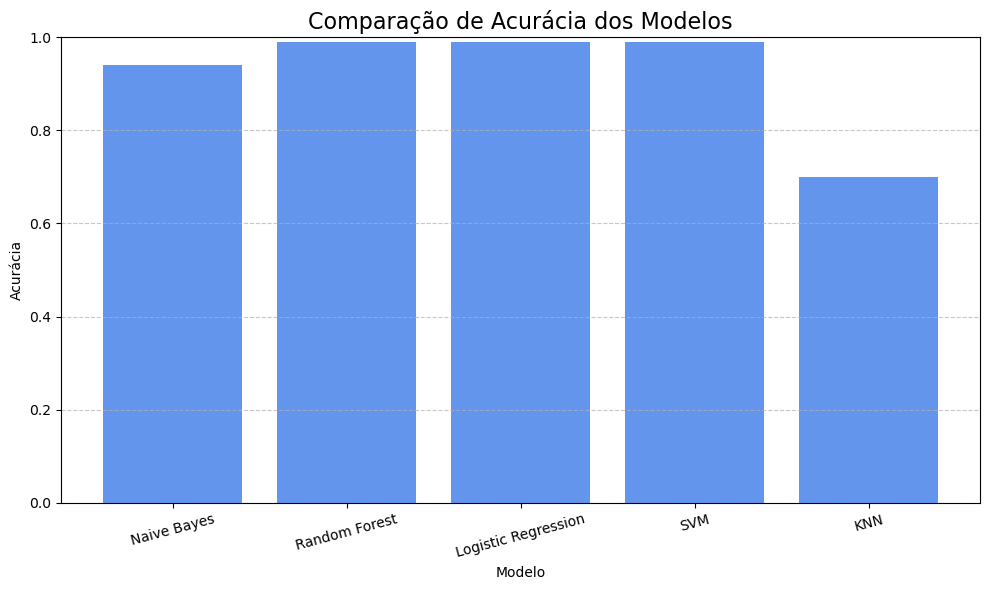

In [37]:
modelos = ["Naive Bayes", "Random Forest", "Logistic Regression", "SVM", "KNN"]
acuracias = [0.94, 0.99, 0.99, 0.99, 0.70]

plt.figure(figsize=(10, 6))
plt.bar(modelos, acuracias, color='cornflowerblue')
plt.ylim(0, 1.0)
plt.title("Comparação de Acurácia dos Modelos", fontsize=16)
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()